In [38]:
import numpy as np
import ChebTools as ct
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
# generating a Chebyshev expansion

# interval range, Chebyshev polynomials are orthogonal on [-1,1]
xmin = 0
xmax = 2*np.pi

# number of interpolation points
N = 10

cheb_sin = ct.generate_Chebyshev_expansion(N, np.sin, xmin, xmax)

cheb_cos = ct.generate_Chebyshev_expansion(50, np.cos, xmin, xmax)

# Accessing Copies of the Expansion's Fields

In [40]:
# getting a copy the Chebyshev coefficients
cheb_sin.coef()

array([-8.15320034e-17, -5.69230686e-01, -1.73472348e-16,  6.66916672e-01,
        9.71445147e-17, -1.04282368e-01,  3.64291930e-17,  6.84053819e-03,
        1.45716772e-16, -2.44156637e-04, -1.26634814e-16])

In [41]:
# getting the xmin and xmax of the interval for the expansion
print(cheb_sin.xmin())
print(cheb_sin.xmax())

0.0
6.283185307179586


# Evaluating a Chebyshev Expansion

In [42]:
# evaluating a Chebyshev expansion with a floating point value
cheb_sin.y(np.pi)

4.2500725161431774e-16

In [43]:
# evaluating a Chebyshev expansion with a numpy array
cheb_sin.y(np.linspace(0,2*np.pi,5))

array([ 3.07046055e-16,  1.00000877e+00,  4.25007252e-16, -1.00000877e+00,
       -6.43582410e-16])

# Arithmetic Operations of Expansions

The object oriented nature of dealing with Chebyshev Expansions allows for readable code.

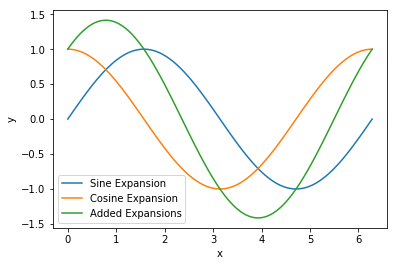

In [44]:
# adding two expansions
# two expansions must have the same xmin and xmax
chebs_added = cheb_sin + cheb_cos

# interval for plotting
xvals = np.linspace(xmin, xmax, 100)

plt.figure()
plt.plot(xvals, cheb_sin.y(xvals), label="Sine Expansion")
plt.plot(xvals, cheb_cos.y(xvals), label="Cosine Expansion")
plt.plot(xvals, chebs_added.y(xvals), label="Added Expansions")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

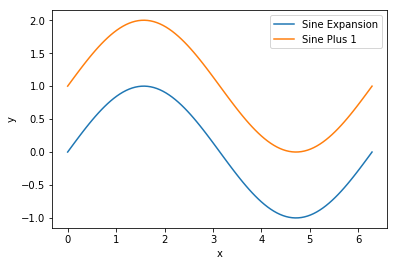

In [45]:
# adding constant to expansion
# note that operators like +=, -, and -= are also supported

sine_plus1 = cheb_sin + 1

plt.figure()
plt.plot(xvals, cheb_sin.y(xvals), label="Sine Expansion")
plt.plot(xvals, sine_plus1.y(xvals), label="Sine Plus 1")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

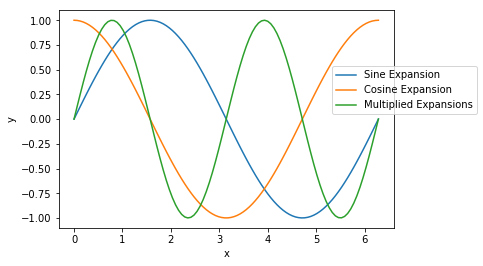

In [46]:
# multiplication of two expansions and multiplication by a constant
# two expansions must have the same xmin and xmax
# the new expansion should look like sin(2x)
chebs_mult = 2 * cheb_sin * cheb_cos

plt.figure()
plt.plot(xvals, cheb_sin.y(xvals), label="Sine Expansion")
plt.plot(xvals, cheb_cos.y(xvals), label="Cosine Expansion")
plt.plot(xvals, chebs_mult.y(xvals), label="Multiplied Expansions")
plt.legend(bbox_to_anchor=(.8,.5))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [47]:
# applying more complicated functions to a Chebyshev expansion object
# implementation comes from pychebfun
f = lambda x: x**2
sin_squared = cheb_sin.apply(f)
cos_squared = cheb_cos.apply(f)

# should return all ones
cheb_added = sin_squared + cos_squared
cheb_added.y(np.linspace(0,2*np.pi,4))

array([1.        , 1.00030965, 1.00030965, 1.        ])

# Derivatives of Expansions

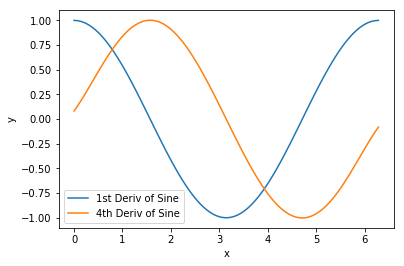

In [48]:
# evaluating the Nth derivative of an Expansion
# note that taking higher derivatives will result in a loss of precision

# 1st derivative of sine should be cosine
cheb_deriv1 = cheb_sin.deriv(1)

# 4th derivative of sine should be sine
cheb_deriv4 = cheb_sin.deriv(4)

plt.figure()
plt.plot(xvals, cheb_deriv1.y(xvals), label="1st Deriv of Sine")
plt.plot(xvals, cheb_deriv4.y(xvals), label="4th Deriv of Sine")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Finding the Roots of An Expansion

In [49]:
xmin = 0
xmax = 4*np.pi
N = 25
long_cos = ct.generate_Chebyshev_expansion(N, np.cos, xmin, xmax)

# true roots of cosine in [0, 4pi]
true_roots = np.pi*np.arange(0,4) + np.pi/2

# finding and sorting the roots of the Chebyshev expansion
# the boolean argument being True means that we want just the roots in [xmin, xmax]
approx_roots = long_cos.real_roots(True)
approx_roots.sort()

# absolute value 
error = np.max(np.abs(true_roots-approx_roots))
print(error)

5.773159728050814e-14


In [50]:
%%timeit
# finding and sorting the roots of the Chebyshev expansion
# the boolean argument being True means that we want just the roots in [xmin, xmax]
approx_roots = long_cos.real_roots(True)
approx_roots.sort()

330 µs ± 33.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


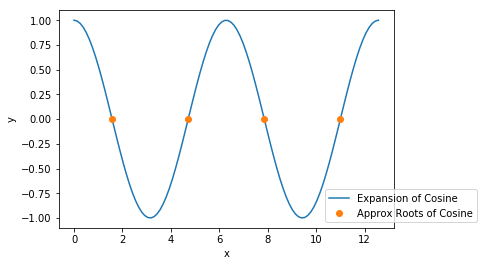

In [51]:
xvals = np.linspace(xmin,xmax,100)
plt.figure()
plt.plot(xvals, long_cos.y(xvals), label="Expansion of Cosine")
plt.plot(approx_roots, long_cos.y(approx_roots), 'o', label="Approx Roots of Cosine")
plt.legend(bbox_to_anchor=(.78,.2))
plt.xlabel("x")
plt.ylabel("y")
plt.show()